# Random forests algorithm
Random forests is a supervised learning algorithm. It can be used both for classification and regression. 
It is also the most flexible and easy to use algorithm. A forest is comprised of trees. It is said that the more 
trees it has, the more robust a forest is. Random forests creates decision trees on randomly selected data samples, 
gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator 
of the feature importance.

It works in four steps:

* Select random samples from a given dataset.
* Construct a decision tree for each sample and get a prediction result from each decision tree.
* Perform a vote for each predicted result.
* Select the prediction result with the most votes as the final prediction.
................................................
## Advantages: 
            Random forests is considered as a highly accurate and robust method because of the number of decision trees 
            participating in the process.
            It does not suffer from the overfitting problem. The main reason is that it takes the average of all the 
            predictions, which cancels out the biases.
            The algorithm can be used in both classification and regression problems.
            Random forests can also handle missing values. (There are two ways to handle these: using median values to replace 
            continuous variables, and computing the proximity-weighted average of missing values.) 
            we can get the relative feature importance, which helps in selecting the most contributing features for the 
            classifier.
## Disadvantages:
               Random forests is slow in generating predictions because it has multiple decision trees. Whenever it makes a
               prediction, all the trees in the forest have to make a prediction for the same given input and then perform 
               voting on it. This whole process is time-consuming.
              The model is difficult to interpret compared to a decision tree, where you can easily make a decision by 
              following the path in the tree
...............................................


In [407]:
#importing libraries
import os
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [0]:
#making new folder in the drive
!mkdir '/content/drive/My Drive/Earthquake_damage'

mkdir: cannot create directory ‘/content/drive/My Drive/Earthquake_damage’: File exists


In [0]:
#if any data is zip file we want to unzip that for future purpose
!unzip '/content/drive/My Drive/Earthquake_damage.zip' -d '/content/drive/My Drive/Earthquake_damage'

In [408]:
#open the dataset files and list the directories available in that dataset file
path="C:\\Users\\best\\Downloads\\Earthquake_damage\\Earthquake_damage"
print(os.listdir(path))

['Building_Ownership_Use.csv', 'Building_Structure.csv', 'ReadMe.md', 'sample_submission.csv', 'test.csv', 'train.csv']


In [409]:
#open the csv file ,and drop the district_id and vdcmun_id from the dataset
data1=pd.read_csv(path+'\\train.csv')      
data1.head()
#data1=training[:10000]


,area_assesed,building_id,damage_grade,district_id,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started,vdcmun_id
0,Both,24385bfd2a2,Grade 4,24,0.0,0,0,0,0,0,0,0,0.0,2489
1,Both,405d1bbebbf,Grade 2,44,0.0,0,0,0,0,0,0,0,1.0,4423
2,Both,351d9bc71f6,Grade 1,36,0.0,0,0,0,0,0,0,0,0.0,3650
3,Building removed,2be3a971166,Grade 5,30,0.0,0,0,0,0,0,0,0,0.0,3016
4,Both,34c7d073ea6,Grade 3,36,0.0,0,0,0,0,0,0,0,0.0,3627


we try to reduce the features using decoding method.we take the result in the different type of risk and store that in a same cell join that result in the different cell and store in the single cell

In [410]:

data1["has_geotechnical_risk"]=data1.iloc[:,4:12].astype(str).agg('-'.join,axis=1)
data1.drop(['district_id','vdcmun_id'],axis=1,inplace=True)

In [264]:
''''print(len(features))
for j in range(len(features)):
    if features[j]=='has_geotechnical_risk':
        index=j
        print(index)'''

"'print(len(features))\nfor j in range(len(features)):\n    if features[j]=='has_geotechnical_risk':\n        index=j\n        print(index)"

In [265]:
''''for i in range(3):
    #list_risk=[]
    for k in range(len(features)-2):
        if k>index:
            #print(features[k])
            features[k+1]=data1[[features[k],features[k+1]]].apply(lambda x:''.join(x),axis=1)
    print(features[k+1])
            #list_risk.append(data1.loc[i,features[k]])
    #print(list_risk)
            #if k==index+1:
              #  new_risk=data1.loc[i,features[k]]
            #else:
              #  new_risk=pd.concat([new_risk,data1.loc[i,features[k]]],axis=0)
    #data1[i,'has_geotechnical_risk']=list_risk
            #print(new_risk)
    
            #print(features[k])'''

"'for i in range(3):\n    #list_risk=[]\n    for k in range(len(features)-2):\n        if k>index:\n            #print(features[k])\n            features[k+1]=data1[[features[k],features[k+1]]].apply(lambda x:''.join(x),axis=1)\n    print(features[k+1])\n            #list_risk.append(data1.loc[i,features[k]])\n    #print(list_risk)\n            #if k==index+1:\n              #  new_risk=data1.loc[i,features[k]]\n            #else:\n              #  new_risk=pd.concat([new_risk,data1.loc[i,features[k]]],axis=0)\n    #data1[i,'has_geotechnical_risk']=list_risk\n            #print(new_risk)\n    \n            #print(features[k])"

In [207]:
''''for i in range(3):
    list_new=[]
    for k in range(len(features)-2):
        if k<3:
            a=data1.loc[i,features[k]]
            print(a)
            if a==Both:
                print(feature[k])
            #print(data1.loc[i,features[k]])
             
            
            #list_new.append(features[k])
   # print(list_new)'''
           

"'for i in range(3):\n    list_new=[]\n    for k in range(len(features)-2):\n        if k<3:\n            a=data1.loc[i,features[k]]\n            print(a)\n            if a==Both:\n                print(feature[k])\n            #print(data1.loc[i,features[k]])\n             \n            \n            #list_new.append(features[k])\n   # print(list_new)"

In [208]:
''''data1.loc[i,'has_geotechnical_risk']=list_risk
    else:
        data1.loc[i,'has_geotechnical_risk']="no risk"'''

'\'data1.loc[i,\'has_geotechnical_risk\']=list_risk\n    else:\n        data1.loc[i,\'has_geotechnical_risk\']="no risk"'

In [209]:
''''i=0
for i in range(len(data1)):
    list_risk=[]
    if data1.loc[i,'has_geotechnical_risk']==1:
        for k in range(len(features)-2):
            if k>index:
                list_risk.append(features[k])
        print(list_risk)'''
   

"'i=0\nfor i in range(len(data1)):\n    list_risk=[]\n    if data1.loc[i,'has_geotechnical_risk']==1:\n        for k in range(len(features)-2):\n            if k>index:\n                list_risk.append(features[k])\n        print(list_risk)"

In [411]:
data1.head(20)

,area_assesed,building_id,damage_grade,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started
0,Both,24385bfd2a2,Grade 4,0.0-0-0-0-0-0-0-0,0,0,0,0,0,0,0,0.0
1,Both,405d1bbebbf,Grade 2,0.0-0-0-0-0-0-0-0,0,0,0,0,0,0,0,1.0
2,Both,351d9bc71f6,Grade 1,0.0-0-0-0-0-0-0-0,0,0,0,0,0,0,0,0.0
3,Building removed,2be3a971166,Grade 5,0.0-0-0-0-0-0-0-0,0,0,0,0,0,0,0,0.0
4,Both,34c7d073ea6,Grade 3,0.0-0-0-0-0-0-0-0,0,0,0,0,0,0,0,0.0
5,Exterior,1f54965821f,Grade 5,0.0-0-0-0-0-0-0-0,0,0,0,0,0,0,0,0.0
6,Both,2beb42eaeee,Grade 2,1.0-0-0-0-1-0-0-1,0,0,0,1,0,0,1,0.0
7,Both,25e8adfd09a,Grade 5,0.0-0-0-0-0-0-0-0,0,0,0,0,0,0,0,0.0
8,Both,1e96b58fa58,Grade 1,0.0-0-0-0-0-0-0-0,0,0,0,0,0,0,0,NaN
9,Both,392cbd772c9,Grade 3,0.0-0-0-0-0-0-0-0,0,0,0,0,0,0,0,1.0


In [412]:
data1.drop(data1.columns[4:11],axis=1,inplace=True)

In [413]:
data1.head()

,area_assesed,building_id,damage_grade,has_geotechnical_risk,has_repair_started
0,Both,24385bfd2a2,Grade 4,0.0-0-0-0-0-0-0-0,0.0
1,Both,405d1bbebbf,Grade 2,0.0-0-0-0-0-0-0-0,1.0
2,Both,351d9bc71f6,Grade 1,0.0-0-0-0-0-0-0-0,0.0
3,Building removed,2be3a971166,Grade 5,0.0-0-0-0-0-0-0-0,0.0
4,Both,34c7d073ea6,Grade 3,0.0-0-0-0-0-0-0-0,0.0


In [414]:
data2=pd.read_csv(path+'/Building_Ownership_Use.csv')
data2.head()


,building_id,district_id,vdcmun_id,ward_id,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,a3380c4f75,7,701,70102,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
1,a3380c4fd9,7,701,70102,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
2,a3380c503e,7,701,70102,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
3,a338a4e5f2,7,701,70103,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
4,a338a4e653,7,701,70103,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0


we try to reduce the features using decoding method.we take the result in the different type of users and store that in a same cell join that result in the different cell and store in the single cell

In [415]:
data2["has_secondary_use"]=data2.iloc[:,6:].astype(str).agg('-'.join,axis=1)
data2.drop(['district_id','vdcmun_id'],axis=1,inplace=True)

In [382]:
data2.head()

,building_id,ward_id,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,a3380c4f75,70102,Private,1.0,0.0-0-0-0-0-0-0-0-0-0-0,0,0,0,0,0,0,0,0,0,0
1,a3380c4fd9,70102,Private,1.0,0.0-0-0-0-0-0-0-0-0-0-0,0,0,0,0,0,0,0,0,0,0
2,a3380c503e,70102,Private,1.0,0.0-0-0-0-0-0-0-0-0-0-0,0,0,0,0,0,0,0,0,0,0
3,a338a4e5f2,70103,Private,1.0,0.0-0-0-0-0-0-0-0-0-0-0,0,0,0,0,0,0,0,0,0,0
4,a338a4e653,70103,Private,1.0,0.0-0-0-0-0-0-0-0-0-0-0,0,0,0,0,0,0,0,0,0,0


In [383]:
data2.drop(data2.columns[5:],axis=1,inplace=True)

In [384]:
data2.head()

,building_id,ward_id,legal_ownership_status,count_families,has_secondary_use
0,a3380c4f75,70102,Private,1.0,0.0-0-0-0-0-0-0-0-0-0-0
1,a3380c4fd9,70102,Private,1.0,0.0-0-0-0-0-0-0-0-0-0-0
2,a3380c503e,70102,Private,1.0,0.0-0-0-0-0-0-0-0-0-0-0
3,a338a4e5f2,70103,Private,1.0,0.0-0-0-0-0-0-0-0-0-0-0
4,a338a4e653,70103,Private,1.0,0.0-0-0-0-0-0-0-0-0-0-0


In [385]:
#we have different csv file so that we want compain all table together .there merge the data tables based building_id
data3 = pd.merge(data2,data1,on=['building_id'])

In [386]:
data4=pd.read_csv(path+'/Building_Structure.csv')
data4.head()
data4.drop(['district_id','vdcmun_id','ward_id'],axis=1,inplace=True)

In [387]:
data= pd.merge(data4,data3,on=['building_id'])

In [388]:
data.head()

,building_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,...,has_superstructure_other,condition_post_eq,ward_id,legal_ownership_status,count_families,has_secondary_use,area_assesed,damage_grade,has_geotechnical_risk,has_repair_started
0,a3380c4fd9,1,1,32,324,9,9,Moderate slope,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,...,1,Damaged-Repaired and used,70102,Private,1.0,0.0-0-0-0-0-0-0-0-0-0-0,Both,Grade 2,0.0-0-0-0-0-0-0-0,1.0
1,a3380c503e,2,2,34,456,18,18,Moderate slope,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,...,1,Damaged-Repaired and used,70102,Private,1.0,0.0-0-0-0-0-0-0-0-0-0-0,Both,Grade 3,0.0-0-0-0-0-0-0-0,1.0
2,a338a4e5f2,2,2,20,452,18,18,Moderate slope,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,...,1,Damaged-Repaired and used,70103,Private,1.0,0.0-0-0-0-0-0-0-0-0-0-0,Both,Grade 3,0.0-0-0-0-0-0-0-0,1.0
3,a338a4e71f,1,1,44,546,9,9,Moderate slope,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,...,0,Damaged-Not used,70103,Private,1.0,0.0-0-0-0-0-0-0-0-0-0-0,Both,Grade 4,0.0-0-0-0-0-0-0-0,1.0
4,a339d612f3,1,1,25,324,9,9,Moderate slope,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,...,1,Damaged-Not used,70105,Private,1.0,0.0-0-0-0-0-0-0-0-0-0-0,Both,Grade 3,0.0-0-0-0-0-0-0-0,1.0


In [389]:
data.drop('legal_ownership_status',axis=1,inplace=True)

In [390]:
#list the what are the featuers consider for training
features=list(data)
print(features)

['building_id', 'count_floors_pre_eq', 'count_floors_post_eq', 'age_building', 'plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq', 'land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 'condition_post_eq', 'ward_id', 'count_families', 'has_secondary_use', 'area_assesed', 'damage_grade', 'has_geotechnical_risk', 'has_repair_started']


In [391]:
#if any empty cells are present we want to remove that cell contain row where axis is we can give 1 for removing column 0 for removing row. 
#like that how we can give any and all.any for removing that perticular any’ : drop if any NaN / missing value is present ‘all’ : drop if all the values 
#are missing / NaN .thresh: threshold for non NaN values ,inplace: If True then make changes in the dataplace itself
data=data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [392]:
#it is used to find the number of any empty cell present in the table
data.isnull().sum()

building_id                               0
count_floors_pre_eq                       0
count_floors_post_eq                      0
age_building                              0
plinth_area_sq_ft                         0
height_ft_pre_eq                          0
height_ft_post_eq                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo                 0
has_superstructure_rc_non_engine

In [330]:
#from sklearn.preprocessing import LabelEncoder
# Instatniate LabelEncoder
#le = LabelEncoder()
#data['damage_grade']=le.fit_transform(data['damage_grade'])

In [355]:
data["damage_grade"].head()

0    2
1    2
2    1
3    3
4    1
Name: damage_grade, dtype: int32

In [393]:
#there we apply encoding  the data using LabelEncoding,how mony classes are there based on the label is giving
from sklearn.preprocessing import LabelEncoder
# Instatniate LabelEncoder
le = LabelEncoder()
for feature in features:
  # LabelEncode damage_grade of data
  data[feature] = le.fit_transform(data[feature])
  # Inspecting encoded data
  data.head()

In [394]:
data.head()

,building_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,...,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,ward_id,count_families,has_secondary_use,area_assesed,damage_grade,has_geotechnical_risk,has_repair_started
0,582792,0,1,32,253,3,4,1,2,1,...,0,1,2,0,1,0,0,1,0,1
1,582793,1,2,34,385,12,13,1,2,1,...,0,1,2,0,1,0,0,2,0,1
2,582794,1,2,20,381,12,13,1,2,1,...,0,1,2,1,1,0,0,2,0,1
3,582795,0,1,44,475,3,4,1,2,1,...,0,0,1,1,1,0,0,3,0,1
4,582796,0,1,25,253,3,4,1,2,1,...,0,1,1,2,1,0,0,2,0,1


In [0]:
#apply the onehotencoding method ,this method produces a vector with length equal to the number of categories in the data set.  If a data
# point belongs to the ith category then components of this vector are assigned the value 0 except for the ith component, which is assigned
# a value of 1.  In this way one can keep track of the categories in a numerically meaningful way.
#data=pd.get_dummies(data, columns=["area_assesed","condition_post_eq","plan_configuration","land_surface_condition","foundation_type","roof_type","ground_floor_type","other_floor_type","position"],drop_first=True)

In [395]:
data.drop('building_id',axis=1,inplace=True)

In [396]:
data.head()

,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,...,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,ward_id,count_families,has_secondary_use,area_assesed,damage_grade,has_geotechnical_risk,has_repair_started
0,0,1,32,253,3,4,1,2,1,1,...,0,1,2,0,1,0,0,1,0,1
1,1,2,34,385,12,13,1,2,1,1,...,0,1,2,0,1,0,0,2,0,1
2,1,2,20,381,12,13,1,2,1,1,...,0,1,2,1,1,0,0,2,0,1
3,0,1,44,475,3,4,1,2,1,1,...,0,0,1,1,1,0,0,3,0,1
4,0,1,25,253,3,4,1,2,1,1,...,0,1,1,2,1,0,0,2,0,1


In [0]:
'''from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features = categorical_feature_mask, sparse=False ) '''

NameError: ignored

In [0]:
#where normalize the data , to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values.
''''def normalize(dataset):
    dataNorm=((dataset-dataset.min())/(dataset.max()-dataset.min()))*20
    #dataNorm["has_geotechnical_risk_fault_crack"]=dataset["has_geotechnical_risk_fault_crack"]
    return dataNorm''

In [359]:
#data=normalize(data)
#data.sample(5)

In [397]:
#correlation method is used to find the relationship between the features.that range -1 to 1.if corelaton value near to -1 and 1 that features
# have relationship each other but that value become 0 there is no relation ship
relation=data.corr(method ='pearson')

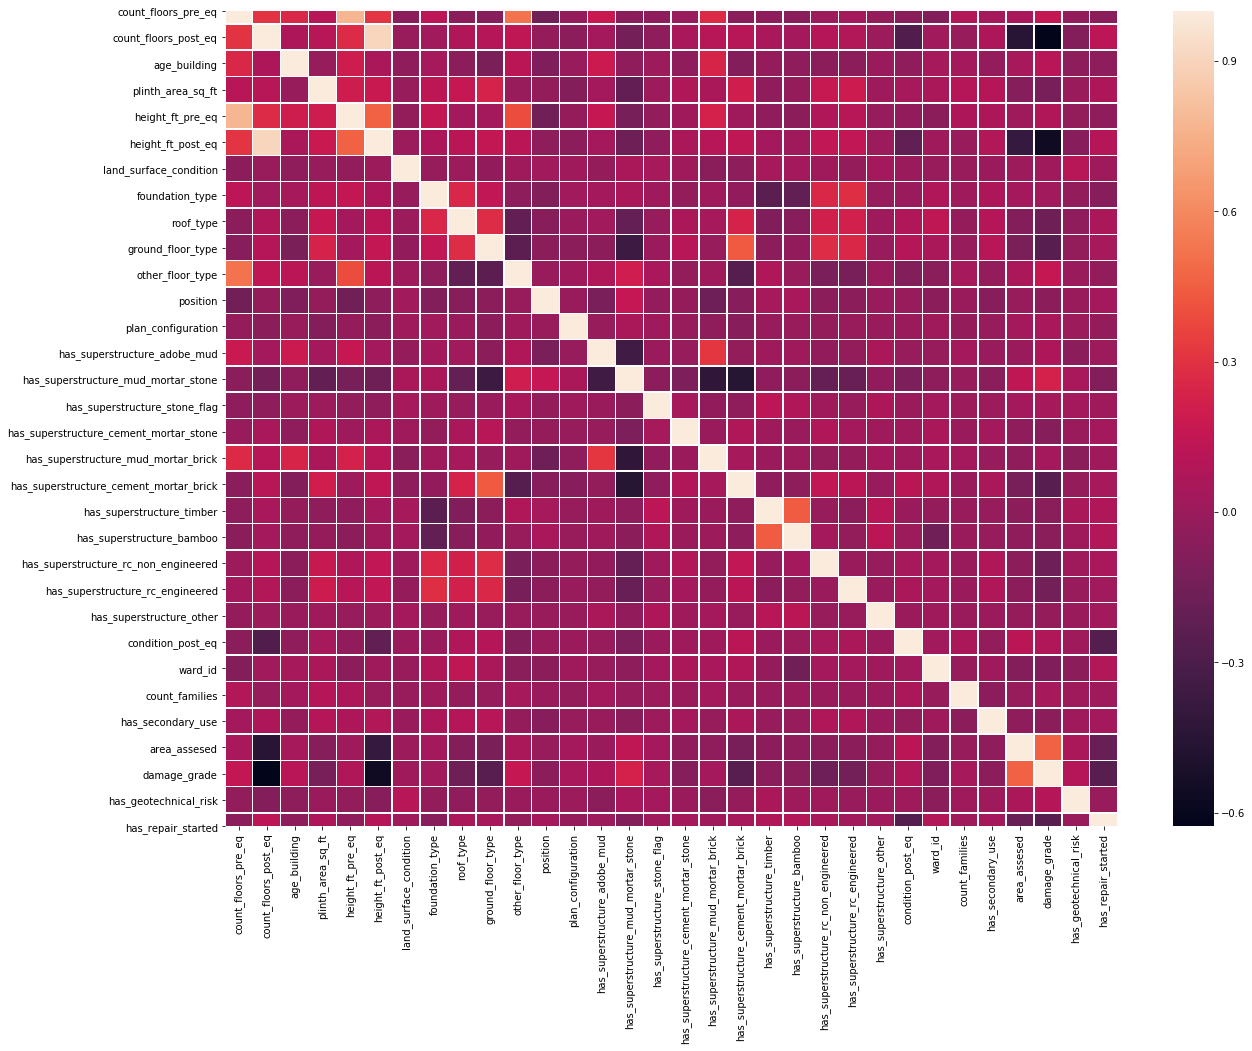

In [398]:

# importing the required module 
import matplotlib.pyplot as plt
import seaborn as sbn
plt.subplots(figsize=(20,15))
a=sbn.heatmap(relation,linewidth=0.5)

In [399]:
#based on the correlation removing the related features from the dataset
data.drop(['count_floors_pre_eq'],axis=1,inplace=True)

In [400]:
data.head()

,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,...,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,ward_id,count_families,has_secondary_use,area_assesed,damage_grade,has_geotechnical_risk,has_repair_started
0,1,32,253,3,4,1,2,1,1,0,...,0,1,2,0,1,0,0,1,0,1
1,2,34,385,12,13,1,2,1,1,2,...,0,1,2,0,1,0,0,2,0,1
2,2,20,381,12,13,1,2,1,1,2,...,0,1,2,1,1,0,0,2,0,1
3,1,44,475,3,4,1,2,1,1,0,...,0,0,1,1,1,0,0,3,0,1
4,1,25,253,3,4,1,2,1,1,0,...,0,1,1,2,1,0,0,2,0,1


In [364]:
#list the what are the featuers consider for training
#features=list(data)
#print(features)

In [365]:
'''import matplotlib.pyplot as plt
#data.plot(x =data['height_ft_post_eq'], y=data['count_floors_post_eq'], kind = 'line')
#plt.show()
plt.scatter(data['height_ft_post_eq'], data['count_floors_post_eq'])
#plt.plot(data['height_ft_post_eq'], data['count_floors_post_eq'])
#plt.xlabel(data['height_ft_post_eq'])
#plt.ylabel(data['count_floors_post_eq'])'''

"import matplotlib.pyplot as plt\n#data.plot(x =data['height_ft_post_eq'], y=data['count_floors_post_eq'], kind = 'line')\n#plt.show()\nplt.scatter(data['height_ft_post_eq'], data['count_floors_post_eq'])\n#plt.plot(data['height_ft_post_eq'], data['count_floors_post_eq'])\n#plt.xlabel(data['height_ft_post_eq'])\n#plt.ylabel(data['count_floors_post_eq'])"

In [0]:
''''import seaborn as sns
sns.heatmap(realatin, 
        xticklabels=,
        yticklabels=realatin['count_floors_post_eq'])'''

"'import seaborn as sns\nsns.heatmap(realatin, \n        xticklabels=realatin['height_ft_post_eq',\n        yticklabels=realatin['count_floors_post_eq'])"

In [0]:
#from the dataset any cell is empty then it replace with 0
#data.fillna(0,inplace=True)

In [401]:
#we create two class with or without grade.so that in x contain dataset without grade and y contain with label.for 
#training purpose we make this category
x = data.drop('damage_grade', axis=1)
y = data['damage_grade']


In [402]:
#we want training and testing dataset for that we splite the available dataset by using train_test_split.spliting done with 80% training 20% for testing
from sklearn.model_selection import train_test_split
x_Train, x_Test, y_Train, y_Test = train_test_split(x, y, test_size = 0.2,train_size=0.8)

In [403]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)


In [404]:

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_Train,y_Train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [405]:
y_pred=clf.predict(x_Test)

In [406]:
#At this point we have trained our algorithm and made some predictions. Now we'll see how accurate our algorithm is. 
#For classification tasks some commonly used metrics are confusion matrix, precision, recall, and F1 score. 
#Lucky for us Scikit=-Learn's metrics library contains the classification_report and confusion_matrix methods that can be used 
#to calculate these metrics for us:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_Test, y_pred))
print(classification_report(y_Test, y_pred))

[[ 3876  1162   396    66     1]
 [  395  9090  5282  2109     7]
 [  152  4864 11879  7640    20]
 [   20  1339  5335 23586   122]
 [    0    48   187  1711 40382]]
              precision    recall  f1-score   support

           0       0.87      0.70      0.78      5501
           1       0.55      0.54      0.54     16883
           2       0.51      0.48      0.50     24555
           3       0.67      0.78      0.72     30402
           4       1.00      0.95      0.97     42328

    accuracy                           0.74    119669
   macro avg       0.72      0.69      0.70    119669
weighted avg       0.75      0.74      0.74    119669



In [0]:
result =clf.score(x_Test, y_Test)
print("Accuracy: %.3f%%" % (result*100.0))

#est1=x_Test.sample()
# Use the forest's predict method on the test data
#predictions = clf.predict(y_Test)
# Calculate the absolute errors
#errors = abs(predictions - y_Test)
# Print out the mean absolute error (mae)
#print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Accuracy: 73.822%
